# 통계 분석 및 가설 검정
- 교차분석
- 상관분석
- T-test

# 데이터셋 살펴보기

### 1) 전라북도 전주시 음식점기본정보

- https://www.data.go.kr/data/15076735/fileData.do#tab-layer-file


- 예시 - 전주시 한국식당
[네이버 검색 결과](https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%A0%84%EC%A3%BC%EC%8B%9C+%ED%95%9C%EA%B5%AD%EC%8B%9D%EB%8B%B9&oquery=%EC%A0%84%EC%A3%BC%EC%8B%9C+%ED%95%9C%EA%B5%AD%EC%8B%9D%EB%8B%B9&tqi=hCJU5wp0J1ZssfyQN4lssssst5o-242856
)

### 2) 전라북도 전주시 음식점품질정보
- https://www.data.go.kr/data/15099652/fileData.do#tab-layer-file

- 수용태세지수
  - http://company.redtable.global/board_info/index.php?id=5
<br>
<br>
<img src = "https://cdn.sisamagazine.co.kr/news/photo/202107/364475_373781_411.png" width = 500>

# SciPy stats 라이브러리

공식 문서: https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# 교차 분석 (Chi-square Test)

In [2]:
drink = pd.DataFrame({
    '성별' : ['남', '남', '남', '여', '여'] * 10,
    '애주가' : ['해당', '해당', '비해당', '비해당', '해당'] * 10
})

In [6]:
len(drink)

50

In [7]:
con = pd.crosstab(drink['성별'], drink['애주가']) 
con

애주가,비해당,해당
성별,,
남,10,20
여,10,10


In [8]:
percent = pd.crosstab(drink['성별'], drink['애주가'], normalize='index') #빈도수를 퍼센트로 표현
percent

애주가,비해당,해당
성별,,
남,0.333333,0.666667
여,0.500000,0.500000


In [9]:
#교차분석 #stats.chi2_contingency()
chi_result = stats.chi2_contingency(con) 

#전체 결과
print(chi_result)

Chi2ContingencyResult(statistic=0.78125, pvalue=0.3767591178115821, dof=1, expected_freq=array([[12., 18.],
       [ 8., 12.]]))


In [10]:
c, p, dof, expected = stats.chi2_contingency(con) 

#p-value만 출력
print("교차분석의 p-value는", p, "입니다")
print("교차분석의 p-value는", '%.3f' % p, "입니다")

교차분석의 p-value는 0.3767591178115821 입니다
교차분석의 p-value는 0.377 입니다


# 데이터 합치기

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
df200 = pd.read_csv("/content/전라북도 전주시_음식점품질정보.csv")
df100 = pd.read_csv("/content/전라북도 전주시_음식점기본정보.csv")

In [35]:
display(df100.head(2), df200.head(2))

,식당(ID),식당명,도로명주소,지번주소,식당위도,식당경도,식당대표전화번호,영업신고증업태명,영업인허가명,음식점소개내용,식당상태
0,1681,진미반점,전라북도 전주시 완산구 전라감영3길 12-3,전라북도 전주시 완산구 중앙동2가 44-1,35.816511,127.143362,063-284-4218,한식,일반음식점,"전라북도 전주시에 가신다면 ""진미반점""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중
1,2691,한국식당,전라북도 전주시 완산구 전라감영로 48-1,전라북도 전주시 완산구 중앙동4가 34,35.815434,127.144495,063-284-6932,한식,일반음식점,"전라북도 전주시에 가신다면 ""한국식당""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중


,식당(ID),식당명,지역명,어워드정보설명,(RTI)지수,온라인화진행여부,수용태세지수,인기도,트립어드바이저평점,씨트립평점,네이버평점,식당상태
0,2691,한국식당,전라북도 전주시,안심식당,0.18,Y,0.13,0.34,4.0,NaN,4.18,운영중
1,3101,PNB풍년제과 본점,전라북도 전주시,NaN,0.20,Y,0.14,0.67,4.5,NaN,4.37,운영중


In [36]:
df = pd.merge(df100, df200, how='inner')

In [37]:
df

,식당(ID),식당명,도로명주소,지번주소,식당위도,식당경도,식당대표전화번호,영업신고증업태명,영업인허가명,음식점소개내용,식당상태,지역명,어워드정보설명,(RTI)지수,온라인화진행여부,수용태세지수,인기도,트립어드바이저평점,씨트립평점,네이버평점
0,1681,진미반점,전라북도 전주시 완산구 전라감영3길 12-3,전라북도 전주시 완산구 중앙동2가 44-1,35.816511,127.143362,063-284-4218,한식,일반음식점,"전라북도 전주시에 가신다면 ""진미반점""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중,전라북도 전주시,안심식당,0.10,Y,0.11,0.33,NaN,NaN,4.37
1,2691,한국식당,전라북도 전주시 완산구 전라감영로 48-1,전라북도 전주시 완산구 중앙동4가 34,35.815434,127.144495,063-284-6932,한식,일반음식점,"전라북도 전주시에 가신다면 ""한국식당""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중,전라북도 전주시,안심식당,0.18,Y,0.13,0.34,4.0,NaN,4.18
2,3101,PNB풍년제과 본점,전라북도 전주시 완산구 팔달로 180,전라북도 전주시 완산구 경원동1가 40-5,35.818435,127.147196,063-285-6666,제과점영업,제과점영업,"2014년 09월 20일 Ystar 식신로드 200회, 2014년 05월 12일 S...",운영중,전라북도 전주시,NaN,0.20,Y,0.14,0.67,4.5,NaN,4.37
3,3103,가람나주곰탕,전라북도 전주시 덕진구 떡전로 5,전라북도 전주시 덕진구 금암동 794-7,35.835715,127.128254,063-227-3395,한식,일반음식점,"어디 가야 할지 고민이시라고요? 그럼 전라북도 전주시 맛집, ""가람 나주곰탕""을 추...",운영중,전라북도 전주시,NaN,0.10,Y,0.11,0.04,NaN,NaN,4.45
4,4121,태봉집,전라북도 전주시 완산구 전주객사5길 43-14,전라북도 전주시 완산구 고사동 195-1,35.820261,127.144530,063-283-2458,복어취급,일반음식점,"2019년 09월 27일 TV조선 식객허영만의백반기행 18회에서 소개되었던 맛집, ...",운영중,전라북도 전주시,NaN,0.14,Y,0.13,0.36,2.0,NaN,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,887158,동명카츠 서곡점,전라북도 전주시 완산구 서곡로 20-1,전라북도 전주시 완산구 효자동3가 1483-2,35.831413,127.097508,063-901-0109,NaN,일반음식점,"전라북도 전주시에서 가 볼 만한 식당을 찾으신다면? ""동명카츠(서곡점)""를 추천합니다!",신규,전라북도 전주시,NaN,0.09,N,0.15,0.06,NaN,NaN,4.22
3472,887150,길튼김밥,전라북도 전주시 완산구 전주객사1길 101,전라북도 전주시 완산구 다가동4가 149-1,35.820642,127.137878,063-231-7300,NaN,일반음식점,"무엇을 먹을지 고민되신다고요? 전라북도 전주시에 계시다면 ""길튼김밥""을 추천합니다!...",신규,전라북도 전주시,NaN,0.11,N,0.20,0.08,NaN,NaN,4.74
3473,887144,거북집막걸리,전라북도 전주시 완산구 흑석로 19-4,전라북도 전주시 완산구 서서학동 281-6,35.802363,127.150441,NaN,NaN,일반음식점,"어디 가야 할지 고민이시라고요? 그럼 전라북도 전주시 맛집, ""거북집막걸리""를 추천...",신규,전라북도 전주시,NaN,0.10,N,0.11,NaN,NaN,NaN,4.50
3474,888245,참치담,전라북도 전주시 덕진구 세병로 92,전라북도 전주시 덕진구 송천동2가 1342,35.872553,127.134305,070-7576-1793,NaN,일반음식점,"전라북도 전주시에서 가 볼 만한 식당을 찾으신다면? ""참치담""을 추천합니다! 남녀 ...",신규,전라북도 전주시,NaN,0.10,N,0.17,0.04,NaN,NaN,4.71


In [38]:
print(df100.shape, df200.shape, df.shape)

(3476, 11) (3477, 12) (3476, 20)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   식당(ID)     3476 non-null   int64  
 1   식당명        3476 non-null   object 
 2   도로명주소      3452 non-null   object 
 3   지번주소       3472 non-null   object 
 4   식당위도       3476 non-null   float64
 5   식당경도       3476 non-null   float64
 6   식당대표전화번호   2941 non-null   object 
 7   영업신고증업태명   2683 non-null   object 
 8   영업인허가명     2643 non-null   object 
 9   음식점소개내용    3476 non-null   object 
 10  식당상태       3476 non-null   object 
 11  지역명        2643 non-null   object 
 12  어워드정보설명    130 non-null    object 
 13  (RTI)지수    2446 non-null   float64
 14  온라인화진행여부   3476 non-null   object 
 15  수용태세지수     3476 non-null   float64
 16  인기도        2303 non-null   float64
 17  트립어드바이저평점  175 non-null    float64
 18  씨트립평점      2 non-null      float64
 19  네이버평점      2538 non-null   float64
dtypes: float

In [40]:
# 결측치 삭제

df2 = df.drop(['어워드정보설명', '트립어드바이저평점', '씨트립평점'], axis=1)

In [41]:
df2.head(6)

,식당(ID),식당명,도로명주소,지번주소,식당위도,식당경도,식당대표전화번호,영업신고증업태명,영업인허가명,음식점소개내용,식당상태,지역명,(RTI)지수,온라인화진행여부,수용태세지수,인기도,네이버평점
0,1681,진미반점,전라북도 전주시 완산구 전라감영3길 12-3,전라북도 전주시 완산구 중앙동2가 44-1,35.816511,127.143362,063-284-4218,한식,일반음식점,"전라북도 전주시에 가신다면 ""진미반점""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중,전라북도 전주시,0.10,Y,0.11,0.33,4.37
1,2691,한국식당,전라북도 전주시 완산구 전라감영로 48-1,전라북도 전주시 완산구 중앙동4가 34,35.815434,127.144495,063-284-6932,한식,일반음식점,"전라북도 전주시에 가신다면 ""한국식당""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중,전라북도 전주시,0.18,Y,0.13,0.34,4.18
2,3101,PNB풍년제과 본점,전라북도 전주시 완산구 팔달로 180,전라북도 전주시 완산구 경원동1가 40-5,35.818435,127.147196,063-285-6666,제과점영업,제과점영업,"2014년 09월 20일 Ystar 식신로드 200회, 2014년 05월 12일 S...",운영중,전라북도 전주시,0.20,Y,0.14,0.67,4.37
3,3103,가람나주곰탕,전라북도 전주시 덕진구 떡전로 5,전라북도 전주시 덕진구 금암동 794-7,35.835715,127.128254,063-227-3395,한식,일반음식점,"어디 가야 할지 고민이시라고요? 그럼 전라북도 전주시 맛집, ""가람 나주곰탕""을 추...",운영중,전라북도 전주시,0.10,Y,0.11,0.04,4.45
4,4121,태봉집,전라북도 전주시 완산구 전주객사5길 43-14,전라북도 전주시 완산구 고사동 195-1,35.820261,127.144530,063-283-2458,복어취급,일반음식점,"2019년 09월 27일 TV조선 식객허영만의백반기행 18회에서 소개되었던 맛집, ...",운영중,전라북도 전주시,0.14,Y,0.13,0.36,4.17
5,4124,대성회관,전라북도 전주시 완산구 현무1길 9-8,전라북도 전주시 완산구 경원동3가 17-12,35.820259,127.147694,063-284-6492,한식,일반음식점,"전라북도 전주시에서 어디를 갈지 고민이라면! ""대성회관""에 가보시는 건 어떨까요? ...",운영중,전라북도 전주시,0.10,Y,0.10,0.04,4.30


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   식당(ID)    3476 non-null   int64  
 1   식당명       3476 non-null   object 
 2   도로명주소     3452 non-null   object 
 3   지번주소      3472 non-null   object 
 4   식당위도      3476 non-null   float64
 5   식당경도      3476 non-null   float64
 6   식당대표전화번호  2941 non-null   object 
 7   영업신고증업태명  2683 non-null   object 
 8   영업인허가명    2643 non-null   object 
 9   음식점소개내용   3476 non-null   object 
 10  식당상태      3476 non-null   object 
 11  지역명       2643 non-null   object 
 12  (RTI)지수   2446 non-null   float64
 13  온라인화진행여부  3476 non-null   object 
 14  수용태세지수    3476 non-null   float64
 15  인기도       2303 non-null   float64
 16  네이버평점     2538 non-null   float64
dtypes: float64(6), int64(1), object(10)
memory usage: 488.8+ KB


# 지도 위치 시각화

In [43]:
# x좌표(위도 latitude),y좌표(경도 longitude) 

x = []
y = []

for i in range(len(df2['식당위도'])):
    if df2['식당위도'][i] == 0.0 or df2['식당경도'][i] == 0.0:
        pass
    else:
        x.append(df2['식당위도'][i])
        y.append(df2['식당경도'][i])

In [44]:
print(len(x))
print(len(y))

3471
3471


In [45]:
import folium

# 공식 문서 : https://python-visualization.github.io/folium/

In [47]:
#맵 기본 설정
map = folium.Map(location=[x[1],y[1]], 
                 zoom_start=13)

for i in range(len(x)):
    folium.Marker([x[i],y[i]], 
                  popup = '전주식당_%d'% i, 
                  icon=folium.Icon(color = 'blue', 
                                   icon = "cutlery")).add_to(map) 

#icon 디자인 https://www.glyphicons.com/

#서클
folium.CircleMarker(location=[x[13],y[13]], 
                    radius=300, 
                    color="#3186cc", 
                    fill_color="#3186cc").add_to(map)

#맵 저장
map.save('jeonju.html')


In [48]:
map

Output hidden; open in https://colab.research.google.com to view.

# 상관 분석

In [49]:
df3 = df2.dropna(subset=['인기도', '네이버평점', '(RTI)지수'])

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255 entries, 0 to 3475
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   식당(ID)    2255 non-null   int64  
 1   식당명       2255 non-null   object 
 2   도로명주소     2250 non-null   object 
 3   지번주소      2253 non-null   object 
 4   식당위도      2255 non-null   float64
 5   식당경도      2255 non-null   float64
 6   식당대표전화번호  2017 non-null   object 
 7   영업신고증업태명  1857 non-null   object 
 8   영업인허가명    2255 non-null   object 
 9   음식점소개내용   2255 non-null   object 
 10  식당상태      2255 non-null   object 
 11  지역명       2255 non-null   object 
 12  (RTI)지수   2255 non-null   float64
 13  온라인화진행여부  2255 non-null   object 
 14  수용태세지수    2255 non-null   float64
 15  인기도       2255 non-null   float64
 16  네이버평점     2255 non-null   float64
dtypes: float64(6), int64(1), object(10)
memory usage: 317.1+ KB


In [51]:
df3.온라인화진행여부.value_counts()

Y    1990
N     265
Name: 온라인화진행여부, dtype: int64

In [52]:
df3.describe() #숫자 칼럼들만

,식당(ID),식당위도,식당경도,(RTI)지수,수용태세지수,인기도,네이버평점
count,2255.000000,2255.000000,2255.000000,2255.000000,2255.000000,2255.000000,2255.000000
mean,538562.040798,35.813130,127.063934,0.104652,0.153490,0.184058,4.367020
std,264251.241693,0.754810,2.677050,0.024857,0.054783,0.131752,0.196043
min,1681.000000,0.000000,0.000000,0.070000,0.070000,0.010000,3.250000
25%,338512.000000,35.815151,127.107463,0.100000,0.110000,0.060000,4.270000
50%,532779.000000,35.822279,127.119810,0.100000,0.140000,0.170000,4.370000
75%,754267.000000,35.843250,127.134054,0.100000,0.180000,0.330000,4.470000
max,971513.000000,35.882158,127.184686,0.280000,0.390000,0.670000,5.000000


In [53]:
df3.columns

Index(['식당(ID)', '식당명', '도로명주소', '지번주소', '식당위도', '식당경도', '식당대표전화번호',
       '영업신고증업태명', '영업인허가명', '음식점소개내용', '식당상태', '지역명', '(RTI)지수', '온라인화진행여부',
       '수용태세지수', '인기도', '네이버평점'],
      dtype='object')

In [54]:
df4 = df3.rename(columns={'식당(ID)': 'ID', 
                          '식당명' : 'name',
                          '지역명' : 'city',
                          '(RTI)지수': 'RTI',
                          '온라인화진행여부': 'online', 
                          '수용태세지수': 'acceptance', 
                          '인기도': 'popular', 
                          '네이버평점': 'naver',
                          '식당상태' : 'open',
                          '도로명주소': 'add_new',
                          '지번주소' : 'add_old',
                          '식당위도' : 'la',
                          '식당경도' : 'lo',
                          '식당대표전화번호' : 'phone',
                          '영업신고증업태명' : 'types',
                          '영업인허가명' : 'catetory',
                          '음식점소개내용' : 'intro'})

In [55]:
df4

,ID,name,add_new,add_old,la,lo,phone,types,catetory,intro,open,city,RTI,online,acceptance,popular,naver
0,1681,진미반점,전라북도 전주시 완산구 전라감영3길 12-3,전라북도 전주시 완산구 중앙동2가 44-1,35.816511,127.143362,063-284-4218,한식,일반음식점,"전라북도 전주시에 가신다면 ""진미반점""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중,전라북도 전주시,0.10,Y,0.11,0.33,4.37
1,2691,한국식당,전라북도 전주시 완산구 전라감영로 48-1,전라북도 전주시 완산구 중앙동4가 34,35.815434,127.144495,063-284-6932,한식,일반음식점,"전라북도 전주시에 가신다면 ""한국식당""에 방문해보세요~ 지방자치단체 인증을 받은 농...",운영중,전라북도 전주시,0.18,Y,0.13,0.34,4.18
2,3101,PNB풍년제과 본점,전라북도 전주시 완산구 팔달로 180,전라북도 전주시 완산구 경원동1가 40-5,35.818435,127.147196,063-285-6666,제과점영업,제과점영업,"2014년 09월 20일 Ystar 식신로드 200회, 2014년 05월 12일 S...",운영중,전라북도 전주시,0.20,Y,0.14,0.67,4.37
3,3103,가람나주곰탕,전라북도 전주시 덕진구 떡전로 5,전라북도 전주시 덕진구 금암동 794-7,35.835715,127.128254,063-227-3395,한식,일반음식점,"어디 가야 할지 고민이시라고요? 그럼 전라북도 전주시 맛집, ""가람 나주곰탕""을 추...",운영중,전라북도 전주시,0.10,Y,0.11,0.04,4.45
4,4121,태봉집,전라북도 전주시 완산구 전주객사5길 43-14,전라북도 전주시 완산구 고사동 195-1,35.820261,127.144530,063-283-2458,복어취급,일반음식점,"2019년 09월 27일 TV조선 식객허영만의백반기행 18회에서 소개되었던 맛집, ...",운영중,전라북도 전주시,0.14,Y,0.13,0.36,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,887257,하루온찬 상공점,전라북도 전주시 완산구 홍산로 276,전라북도 전주시 완산구 효자동3가 1525-2,35.818238,127.106467,063-224-9300,NaN,일반음식점,"전라북도 전주시에서 가 볼 만한 식당을 찾으신다면? ""하루온찬(상공점)""을 추천합니...",신규,전라북도 전주시,0.10,N,0.14,0.08,4.48
3471,887158,동명카츠 서곡점,전라북도 전주시 완산구 서곡로 20-1,전라북도 전주시 완산구 효자동3가 1483-2,35.831413,127.097508,063-901-0109,NaN,일반음식점,"전라북도 전주시에서 가 볼 만한 식당을 찾으신다면? ""동명카츠(서곡점)""를 추천합니다!",신규,전라북도 전주시,0.09,N,0.15,0.06,4.22
3472,887150,길튼김밥,전라북도 전주시 완산구 전주객사1길 101,전라북도 전주시 완산구 다가동4가 149-1,35.820642,127.137878,063-231-7300,NaN,일반음식점,"무엇을 먹을지 고민되신다고요? 전라북도 전주시에 계시다면 ""길튼김밥""을 추천합니다!...",신규,전라북도 전주시,0.11,N,0.20,0.08,4.74
3474,888245,참치담,전라북도 전주시 덕진구 세병로 92,전라북도 전주시 덕진구 송천동2가 1342,35.872553,127.134305,070-7576-1793,NaN,일반음식점,"전라북도 전주시에서 가 볼 만한 식당을 찾으신다면? ""참치담""을 추천합니다! 남녀 ...",신규,전라북도 전주시,0.10,N,0.17,0.04,4.71


In [56]:
df4['online'].value_counts() #유니크 값 계산

Y    1990
N     265
Name: online, dtype: int64

In [57]:
df4['open'].value_counts()

운영중    1979
신규      276
Name: open, dtype: int64

In [58]:
df4['RTI'].value_counts()

0.10    1462
0.09     508
0.11      88
0.19      44
0.18      40
0.21      28
0.20      25
0.16      22
0.08      19
0.17      10
0.14       3
0.07       3
0.15       2
0.28       1
Name: RTI, dtype: int64

In [59]:
df4[['online', 'open']].apply(pd.Series.value_counts) #동시에 유니크 값 계산

,online,open
N,265.0,NaN
Y,1990.0,NaN
신규,NaN,276.0
운영중,NaN,1979.0


## 칼럼 전체

In [60]:
df4.corr()

<ipython-input-60-d025aacce9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()


,ID,la,lo,RTI,acceptance,popular,naver
ID,1.000000,0.011857,0.008741,-0.187544,0.021316,-0.118766,0.178134
la,0.011857,1.000000,0.999552,0.002166,0.004313,-0.010162,-0.023905
lo,0.008741,0.999552,1.000000,0.004890,0.005318,-0.006667,-0.025218
RTI,-0.187544,0.002166,0.004890,1.000000,0.169900,0.298753,0.135276
acceptance,0.021316,0.004313,0.005318,0.169900,1.000000,0.123375,-0.018984
popular,-0.118766,-0.010162,-0.006667,0.298753,0.123375,1.000000,0.089658
naver,0.178134,-0.023905,-0.025218,0.135276,-0.018984,0.089658,1.000000


In [63]:
# 상관분석 히트맵
# seaborn이 더 예쁜가봄

import seaborn as sns

In [64]:
import matplotlib.pyplot as plt

<ipython-input-65-518474485276>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot=True)


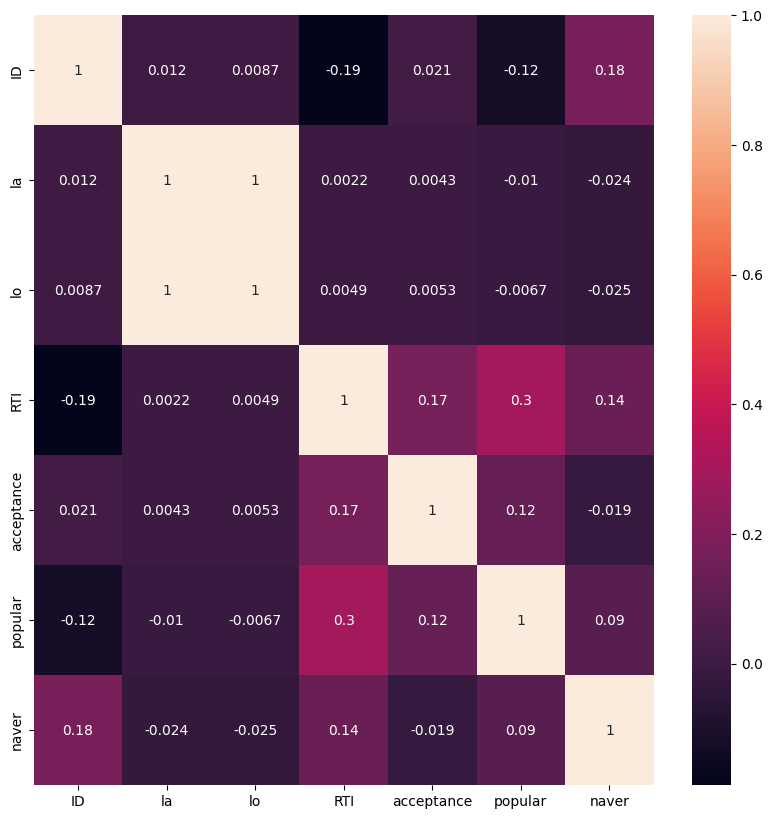

In [65]:
plt.figure(figsize=(10,10))

sns.heatmap(df4.corr(), annot=True)

plt.show()

## 특정 칼럼들

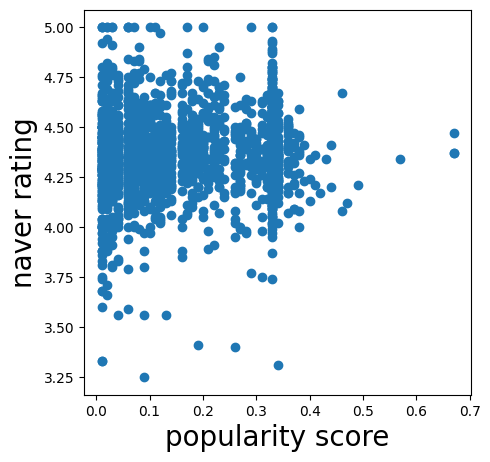

In [66]:
#scatter plot

plt.figure(figsize=(5,5))

plt.scatter(df4.popular, df4.naver)

plt.xlabel('popularity score', fontsize = 20)

plt.ylabel('naver rating', fontsize = 20)

plt.show()

In [67]:
#방법 (1)

df4['popular'].corr(df4['naver'])

0.08965840393304621

In [68]:
#방법 (2)

coef, p = stats.pearsonr(df4['popular'], df4['naver'])

print("상관분석 계수 : ", coef, " p-value : ", p)

상관분석 계수 :  0.08965840393304611  p-value :  2.0095870947713523e-05


##점이연 상관분석 (Point-Biserial correlation)

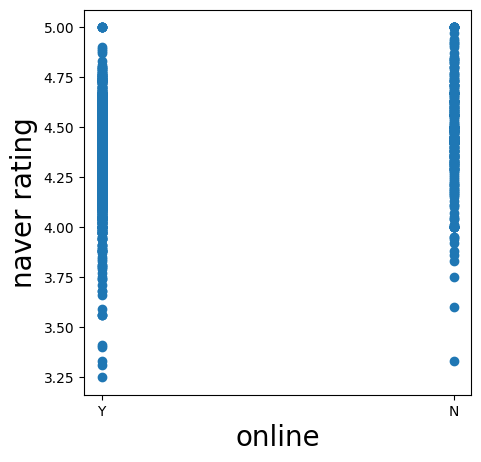

In [69]:
plt.figure(figsize=(5,5))

plt.scatter(df4.online, df4.naver)

plt.xlabel('online', fontsize = 20)

plt.ylabel('naver rating', fontsize = 20)

plt.show()

In [ ]:
stats.pointbiserialr(df4['online'], df4['naver']) 

#오류 #왜?

In [ ]:
#스트링을 숫자로 바꿔주기 #중요

df4.online[df4.online == 'Y'] = 1

df4.online[df4.online == 'N'] = 0

In [ ]:
df4.online

In [ ]:
stats.pointbiserialr(df4['online'], df4['naver']) #다시 시도

# T-test

In [ ]:
# 분산의 동질성 (homoscedasticity)

stats.levene(df4['popular'], df4['naver'])

#pvalue=4.90372702109949e-10 = 0.000000000490372702109949
# 유의함 (P가 0.05보다 작음) 따라서 분산이 동일하지 않음
# 귀무가설 = 분산이 동일하다
# 실험가설 = 분산이 동일하지 않다

In [ ]:
import statistics

In [ ]:
statistics.variance(df4['popular'])

In [ ]:
statistics.variance(df4['naver'])

In [ ]:
statistics.stdev(df4['popular'])

In [ ]:
statistics.stdev(df4['naver'])

In [ ]:
#시각적으로 분산 파악하기

sns.distplot(df4.popular)
plt.show()

In [ ]:
sns.displot(df4.naver)
plt.show()

In [ ]:
#같이 
sns.distplot(df4.popular)
sns.distplot(df4.naver)
plt.show()

In [ ]:
#시각적으로 분산 파악하기

sns.displot(df4, x="popular", kind = 'kde')

In [ ]:
sns.displot(df4, x="naver", kind = 'kde')

In [ ]:
fig = sns.kdeplot(df4['popular'], shade=True, color="r")
fig = sns.kdeplot(df4['naver'], shade=True, color="b")
plt.show()

In [ ]:
# 정규성 - 정규분포를 따르는가 (normality) - Shapiro-Wilk test

In [ ]:
from scipy.stats import shapiro

In [ ]:
sha, p = shapiro(df4['popular'])

print("shapiro 테스트 결과값:", sha, '이며',
      "p-value: ", format(p, '.4f'))

In [ ]:
sha, p = stats.shapiro(df4['naver'])

print("shapiro 테스트 결과값:", sha, '이며',
      "p-value: ", format(p, '.4f'))

In [ ]:
# QQ plot

plt.figure(figsize=(5,5))

stats.probplot(df4['popular'], dist="norm", plot= plt)

plt.title("popular - Q-Q Plot")

In [ ]:
# QQ plot

plt.figure(figsize=(5,5))

stats.probplot(df4['naver'], dist="norm", plot= plt)

plt.title("naver - Q-Q Plot")

In [ ]:
#Shapiro Test 

sha, p = shapiro(df4['popular'])
print("Shapiro 테스트 결과값:", sha, '이며',
      "p-value: ", format(p, '.4f'))

In [ ]:
#Shapiro Test

sha, p = shapiro(df4['naver'])
print("Shapiro 테스트 결과값:", sha, '이며',
      "p-value: ", format(p, '.4f'))

In [ ]:
#T-test 

stats.ttest_ind(df4['popular'], df4['naver'])

In [ ]:
df4['popular'].mean()

In [ ]:
df4['naver'].mean()